# Theory/Computation Problems

### Problem 1 (20 points) 
Show that the stationary point (zero gradient) of the function
$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$
is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$.

![HW2_1](img/HW2_1.jpg)

### Problem 2 (50 points) 

* (10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.

![HW2_2](img/HW2_2.jpg)

* (40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.

--------------------------------------------------------------------
Inital Point: [0. 0.]
corresponding Solution: [ 0.14244893 -0.78544215]


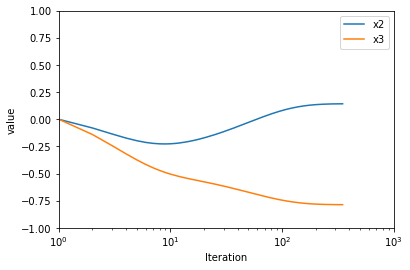

--------------------------------------------------------------------
Inital Point: [1. 1.]
corresponding Solution: [ 0.1424432  -0.78543832]


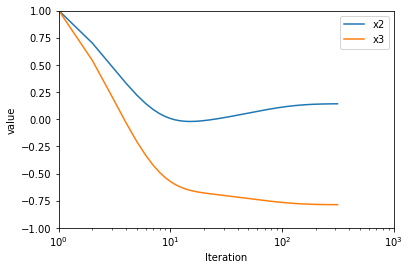

--------------------------------------------------------------------
Inital Point: [-1. -1.]
corresponding Solution: [ 0.14244836 -0.78544176]


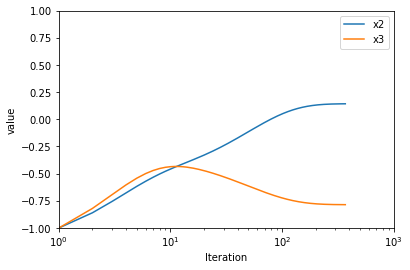

array([ 0.14244836, -0.78544176])

In [183]:
import numpy as np
import matplotlib.pyplot as plt
#define a function of the newton algrithom
def newton(x0): 
    # input is the initial point
    print('--------------------------------------------------------------------')
    obj = lambda x: 5.0*x[0]**2+8.0*x[0]+12.0*x[0]*x[1]+10.0*x[1]**2+14.0*x[1]+5.0 #objective function
    grad = lambda x: np.array([10.0*x[0]+8.0+12.0*x[1],12.0*x[0]+20.0*x[1]+14.0]) #gradient
    eps = 1e-3    
    x = x0 # initial
    soln = np.array([x0]) # array to store the solutions
    soln = np.append(soln,[x],axis=0)
    err = np.linalg.norm(grad(x)) # calculate error
    a = 0.01 # searching speed
    # iteration until error < eps
    while err >= eps:
        x = x - a * grad(x)
        soln = np.append(soln,[x],axis=0)
        err = np.linalg.norm(grad(x))
    #print final solution
    print('Inital Point: ' + str(x0))
    print('corresponding Solution: ' + str(x))
    # plot the log-linear curves
    plt.plot(soln[:,0], label='x2')
    plt.plot(soln[:,1], label='x3')
    plt.xscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('value')
    plt.axis([1, 1000,-1,1])
    plt.legend(loc='best')
    plt.show()
    return x
# test 1
x1 = np.array([0.0, 0.0])
newton(x1)
# test 2
x2 = np.array([1.0, 1.0])
newton(x2)
# test 3
x3 = np.array([-1.0, -1.0])
newton(x3)

### Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$. 
* (5 points) Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$. 
* (5 points) In what conditions will $f(g(x))$ be convex?

![HW2_3](img/HW2_3.jpg)

### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$. 

# Design Problems

### Problem 5 (20 points) 
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.

* (5 points) Formulate this problem as an optimization problem. 
* (5 points) Is your problem convex?
* (5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?
* (5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?